### Simple simulation 
Simple Python backtest. Not a legitimate strategy b/c you can't trade S&P500 index.

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

Matplotlib is building the font cache using fc-list. This may take a moment.


In [1]:
!python3 --version

Python 3.7.3


In [32]:
pd.__version__

'0.25.0'

In [33]:
np.__version__

'1.17.0'

In [17]:
df = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])
df.head()

,SP500
Date,
2009-06-23,895.10
2009-06-24,900.94
2009-06-25,920.26
2009-06-26,918.90
2009-06-29,927.23


In [19]:
# calculate two moving averages
# rolling time window of 40 to 100 rows
# https://stackoverflow.com/questions/40814201/pandas-rolling-gives-nan

df['SMA50'] = df['SP500'].rolling(50, min_periods=1).mean()
df['SMA100'] = df['SP500'].rolling(100, min_periods=1).mean()

df.tail()

,SP500,SMA50,SMA100
Date,,,
2018-07-27,2818.82,2761.6220,2719.8829
2018-07-30,2802.60,2763.2714,2720.6409
2018-07-31,2816.29,2765.3378,2721.4141
2018-08-01,2813.36,2766.9448,2721.6820
2018-08-02,2827.22,2769.0004,2722.1240


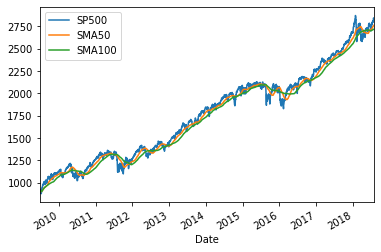

In [20]:
df.plot()

In [22]:
# set to 1 if SMA50 is above SMA100. which days we should be long.
df['Position'] = np.where(df['SMA50'] > df['SMA100'], 1, 0)
df.tail()

,SP500,SMA50,SMA100,Position
Date,,,,
2018-07-27,2818.82,2761.6220,2719.8829,1
2018-07-30,2802.60,2763.2714,2720.6409,1
2018-07-31,2816.29,2765.3378,2721.4141,1
2018-08-01,2813.36,2766.9448,2721.6820,1
2018-08-02,2827.22,2769.0004,2722.1240,1


In [23]:
# buy a day delayed, shift the column
df['Position'] = df['Position'].shift()
df.tail()

,SP500,SMA50,SMA100,Position
Date,,,,
2018-07-27,2818.82,2761.6220,2719.8829,1.0
2018-07-30,2802.60,2763.2714,2720.6409,1.0
2018-07-31,2816.29,2765.3378,2721.4141,1.0
2018-08-01,2813.36,2766.9448,2721.6820,1.0
2018-08-02,2827.22,2769.0004,2722.1240,1.0


In [26]:
df.head()

,SP500,SMA50,SMA100,Position
Date,,,,
2009-06-23,895.10,895.100000,895.100000,NaN
2009-06-24,900.94,898.020000,898.020000,0.0
2009-06-25,920.26,905.433333,905.433333,0.0
2009-06-26,918.90,908.800000,908.800000,0.0
2009-06-29,927.23,912.486000,912.486000,0.0


In [25]:
df[df['Position'].isnull()].head()

,SP500,SMA50,SMA100,Position
Date,,,,
2009-06-23,895.1,895.1,895.1,NaN


In [27]:
# calculate how many percent per day the strategy changes.
# 1. We know how many percent the index moves per day.
# 2. We will be lon 100% of the index if the 50 day moving average is above 100

# calculate the daily percent returns of a strategy
df['StrategyPct'] = df['SP500'].pct_change(1) * df['Position']

In [29]:
df.tail()

,SP500,SMA50,SMA100,Position,StrategyPct
Date,,,,,
2018-07-27,2818.82,2761.6220,2719.8829,1.0,-0.006562
2018-07-30,2802.60,2763.2714,2720.6409,1.0,-0.005754
2018-07-31,2816.29,2765.3378,2721.4141,1.0,0.004885
2018-08-01,2813.36,2766.9448,2721.6820,1.0,-0.001040
2018-08-02,2827.22,2769.0004,2722.1240,1.0,0.004926


In [34]:
# calculate cumulative returns
df['Strategy'] = (df['StrategyPct'] + 1).cumprod()

In [35]:
df.tail()

,SP500,SMA50,SMA100,Position,StrategyPct,Strategy
Date,,,,,,
2018-07-27,2818.82,2761.6220,2719.8829,1.0,-0.006562,2.117344
2018-07-30,2802.60,2763.2714,2720.6409,1.0,-0.005754,2.105161
2018-07-31,2816.29,2765.3378,2721.4141,1.0,0.004885,2.115444
2018-08-01,2813.36,2766.9448,2721.6820,1.0,-0.001040,2.113243
2018-08-02,2827.22,2769.0004,2722.1240,1.0,0.004926,2.123654


In [36]:
# S&P
df['BuyHold'] = (df['SP500'].pct_change(1) + 1).cumprod()

In [37]:
df.tail()

,SP500,SMA50,SMA100,Position,StrategyPct,Strategy,BuyHold
Date,,,,,,,
2018-07-27,2818.82,2761.6220,2719.8829,1.0,-0.006562,2.117344,3.149168
2018-07-30,2802.60,2763.2714,2720.6409,1.0,-0.005754,2.105161,3.131047
2018-07-31,2816.29,2765.3378,2721.4141,1.0,0.004885,2.115444,3.146341
2018-08-01,2813.36,2766.9448,2721.6820,1.0,-0.001040,2.113243,3.143068
2018-08-02,2827.22,2769.0004,2722.1240,1.0,0.004926,2.123654,3.158552


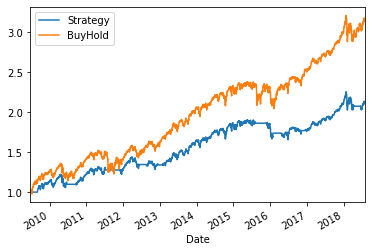

In [38]:
# plot the buy and hold alternative, next to the strategy, to compare
df[['Strategy', 'BuyHold']].plot()

Strategy shows lower returns and lower volatility. But not enough info.

## rolling()
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

window types
- https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows
-  If None, all points are evenly weighted

In [1]:
# examples
import pandas as pd
import numpy as np

df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


In [2]:
# rolling sum with window length of 2, using 'triang' window type
df.rolling(2, win_type='triang').sum()

,B
0,NaN
1,0.5
2,1.5
3,NaN
4,NaN


In [3]:
# rolling sum with window length of 2, min_periods defaults to window length
df.rolling(2).sum()

,B
0,NaN
1,1.0
2,3.0
3,NaN
4,NaN


In [4]:
# explicitly set the min_periods
df.rolling(2, min_periods=1).sum()

,B
0,0.0
1,1.0
2,3.0
3,2.0
4,4.0


In [5]:
# a ragged (not-a-regular freqency). time-indexed DataFrame
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index = [pd.Timestamp('20130101 09:00:00'),
                            pd.Timestamp('20130101 09:00:02'),
                            pd.Timestamp('20130101 09:00:03'),
                            pd.Timestamp('20130101 09:00:05'),
                            pd.Timestamp('20130101 09:00:06')])
df

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [6]:
# compared to an integer rolling window, this will roll a window
# corresponding to the time period. default for min_periods is 1.
df.rolling('2s').sum()

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


## pct_change()

percentage change b/w the current and prior row.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html

In [7]:
# Percentage change in French franc, Deutsche Mark, 
# and Italian lira from 1980-01-01 to 1980-03-01.
df = pd.DataFrame({
     'FR': [4.0405, 4.0963, 4.3149],
     'GR': [1.7246, 1.7482, 1.8519],
     'IT': [804.74, 810.01, 860.13]},
     index=['1980-01-01', '1980-02-01', '1980-03-01'])
df

,FR,GR,IT
1980-01-01,4.0405,1.7246,804.74
1980-02-01,4.0963,1.7482,810.01
1980-03-01,4.3149,1.8519,860.13


In [8]:
df.pct_change(1)

,FR,GR,IT
1980-01-01,NaN,NaN,NaN
1980-02-01,0.013810,0.013684,0.006549
1980-03-01,0.053365,0.059318,0.061876


In [9]:
# Percentage of change in GOOG and APPL stock volume. 
# Shows computing the percentage change between columns.
df = pd.DataFrame({
     '2016': [1769950, 30586265],
     '2015': [1500923, 40912316],
     '2014': [1371819, 41403351]},
     index=['GOOG', 'APPL'])
df

,2016,2015,2014
GOOG,1769950,1500923,1371819
APPL,30586265,40912316,41403351


In [10]:
df.pct_change(axis='columns')

,2016,2015,2014
GOOG,NaN,-0.151997,-0.086016
APPL,NaN,0.337604,0.012002


## pandas.DataFrame.cumprod

Return cumulative product over a Dataframe or Series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumprod.html

In [11]:
# Series
s = pd.Series([2, np.nan, 5, -1, 0])
s

0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [12]:
# by default, NA values are ignored
s.cumprod()

0     2.0
1     NaN
2    10.0
3   -10.0
4    -0.0
dtype: float64

In [13]:
s.cumprod(skipna=False)

0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [14]:
# DataFrame
df = pd.DataFrame([[2.0, 1.0],
                   [3.0, np.nan],
                   [1.0, 0.0]],
                   columns=list('AB'))
df

,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [15]:
# by default, iterate over rows and find product in each column
# axis=None, or axis='index'
df.cumprod()

,A,B
0,2.0,1.0
1,6.0,NaN
2,6.0,0.0


In [16]:
# to iterate over columns and find product in each row, use axis=1
df.cumprod(axis=1)

,A,B
0,2.0,2.0
1,3.0,NaN
2,1.0,0.0
